# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 2 - Ames Housing Data and Kaggle Challenge - Part 2/2

# Contents:
- [Feature Engineering](#Feature-Engineering)
- [Baseline Prediction](#Baseline-Prediction)
- [Modelling and Tuning](#Modelling-and-Tuning)
- [Evaluation of the selected model](#Evaluation-of-the-selected-model)
- [Conclusion and Recommendation](#Conclusion-and-Recommendation)
- [Kaggle challenge Submission](#Kaggle-challenge-submission)
- [Future steps](#Future-steps)


## Feature Engineering

### The Process of Feature Engineering
1. Brainstorming or testing features.
2. Deciding what features to create.
3. Creating features.
4. Checking how the features work with your model.
5. Improving features (if needed).
6. Return to step 1.

## Import libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from numpy import mean , std
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

## Import clean train dataset

In [2]:
df_X = pd.read_csv('../data/df_X.csv')

In [3]:
df_X.columns

Index(['ms_zoning_A (agr)', 'ms_zoning_C (all)', 'ms_zoning_FV',
       'ms_zoning_I (all)', 'ms_zoning_RH', 'ms_zoning_RL', 'ms_zoning_RM',
       'street_Grvl', 'street_Pave', 'alley_Grvl',
       ...
       'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice',
       'house_age'],
      dtype='object', length=333)

In [4]:
df_X.shape

(1975, 333)

## Find the variable correlations to saleprice

In [5]:
corr=df_X.corr().saleprice
type(corr)

pandas.core.series.Series

In [6]:
df_corr = pd.DataFrame({'variable':df_X.columns,
                            'corr':corr})
df_corr['abs_corr']=df_corr['corr'].abs()
df_corr.sort_values('abs_corr', inplace=True, ascending=False)

df_corr.head(10)

,variable,corr,abs_corr
saleprice,saleprice,1.000000,1.000000
gr_liv_area,gr_liv_area,0.687851,0.687851
garage_cars,garage_cars,0.647062,0.647062
garage_area,garage_area,0.640049,0.640049
total_bsmt_sf,total_bsmt_sf,0.621785,0.621785
exter_qual_TA,exter_qual_TA,-0.617950,0.617950
house_age,house_age,-0.606046,0.606046
year_built,year_built,0.606045,0.606045
1st_flr_sf,1st_flr_sf,0.583924,0.583924
year_remod/add,year_remod/add,0.573554,0.573554


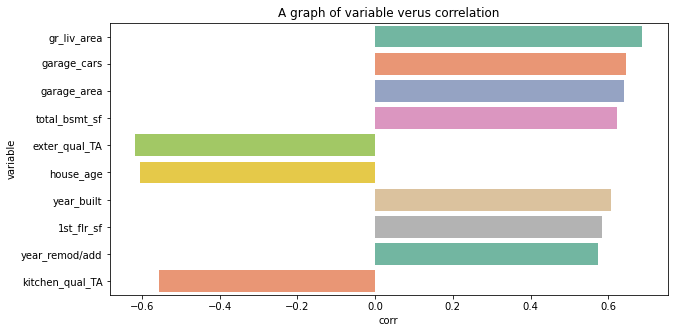

In [7]:
# Correlation between variables and saleprice
plt.figure(figsize=(10,5))
ax=sns.barplot(x='corr',y='variable',data=df_corr[1:11],palette="Set2")
#ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title('A graph of variable verus correlation')
plt.show()

The barplot shows that the top 10 correlations between variable and the saleprice. 

## Baseline Prediction

Since we know very little about our data and can only use a single value, we can still predict the mean.

In [8]:
# Define x and y 
np.random.seed(42)
x = np.linspace(-5, 50, 1975)
y=df_X['saleprice']

In [9]:
df = pd.DataFrame({'X': x, 'Y': y})
df.head()

,X,Y
0,-5.000000,130500
1,-4.972138,220000
2,-4.944276,109000
3,-4.916413,174000
4,-4.888551,138500


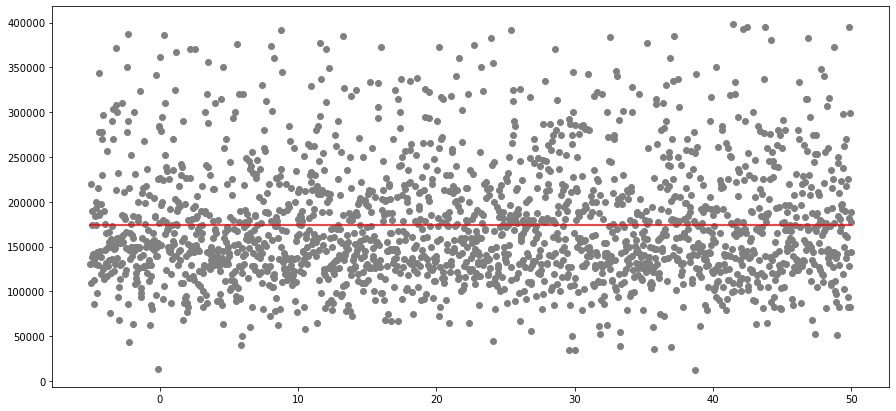

In [10]:
# Plot the data
# create a figure
fig = plt.figure(figsize=(15,7))
# get current axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x, y, c='grey')
ax.plot((df['X'].min(), df['X'].max()),(np.mean(df['Y']), np.mean(df['Y'])), color='r');

We'll add that prediction to our DataFrame to use later

In [11]:
df['Mean_Yhat'] = df['Y'].mean()

In [12]:
df.head()

,X,Y,Mean_Yhat
0,-5.000000,130500,174501.176709
1,-4.972138,220000,174501.176709
2,-4.944276,109000,174501.176709
3,-4.916413,174000,174501.176709
4,-4.888551,138500,174501.176709


In [13]:
# Calculate RMSE
(np.mean(np.square(df['Y'] - df['Mean_Yhat']))) ** 0.5

66481.33069311839

Baseline RMSE is $66481.33. Our model cannot perform worse than this RMSE. 

## Modelling and Tuning

## Linear Regression
Attempt 1: Fit all the variable except saleprice as feature to find out the R2 , cross val score and rmse score

In [14]:
# Define variables
X=df_X.drop(['saleprice'],axis=1)
y=df_X['saleprice']

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

# Scaling of data
ss=StandardScaler()
Z_train=ss.fit_transform(X_train)
Z_test=ss.transform(X_test)

In [15]:
# Linear Regression
lr=LinearRegression()
lr.fit(Z_train,y_train)

# Cross validation
cross_train=cross_val_score(lr,Z_train,y_train,cv=5)
cross_test=cross_val_score(lr,Z_test,y_test,cv=5)

# Make predictions
y_pred=(lr.predict(Z_test))

print("Linear regression:")
print("The R2 score for train linear regression is:",lr.score(Z_train, y_train))
print("The R2 score for test linear regression is:",lr.score(Z_test,y_test))
print("The cross val score for train is:",cross_train.mean())
print("The cross val score for test is:",cross_test.mean())
print("The rmse for linear regression is:",mean_squared_error(y_test, y_pred,squared=False))

Linear regression:
The R2 score for train linear regression is: 0.9483346337644637
The R2 score for test linear regression is: -1.6357198499908025e+24
The cross val score for train is: -6.118093048162444e+25
The cross val score for test is: -3.6506124103886093e+22
The rmse for linear regression is: 8.962732595971803e+16


Remarks: 
- Overfitting occurs for Linear Regression
- Might have multicollinearity in the independent features 
- Redundant variables are affecting the coefficients
- To run regularization (lasso & ridge) as they can take filter feature by adding penalty to our loss function while we fit our model. It can also avoid overfitting

## Lasso Regression
Attempt 1: Fit all the variable except saleprice as feature to find out the R2 , cross val score and rmse score

In [16]:
# Finding optimal alpha using LassoCV
optimal_lasso = LassoCV(n_alphas=20, cv=5, verbose=1,max_iter=50000)
optimal_lasso.fit(Z_train, y_train)

# Lasso Regression 
lasso=Lasso(alpha=optimal_lasso.alpha_,max_iter=100000)
lasso.fit(Z_train, y_train)

# Cross validation
cross_train_l=cross_val_score(lasso,Z_train,y_train,cv=5)
cross_test_l=cross_val_score(lasso,Z_test,y_test,cv=5)

# Make predictions
y1_pred = lasso.predict(Z_test)

# Score
print("Linear regression:")
print("The R2 score for train linear regression is:",lr.score(Z_train, y_train))
print("The R2 score for test linear regression is:",lr.score(Z_test,y_test))
print("The cross val score for train is:",cross_train.mean())
print("The cross val score for test is:",cross_test.mean())
print("The rmse for linear regression is:",mean_squared_error(y_test, y_pred,squared=False))

print() 
print("Lasso regression:")
print("The R2 score for train lasso regression is:",lasso.score(Z_train, y_train))
print("The R2 score for test lasso regression is:",lasso.score(Z_test, y_test))
print("The cross val score for train is:",cross_train_l.mean())
print("The cross val score for test is:",cross_test_l.mean())
print("The rmse for lasso regression is:",mean_squared_error(y_test, y1_pred,squared=False))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
....................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished


Linear regression:
The R2 score for train linear regression is: 0.9483346337644637
The R2 score for test linear regression is: -1.6357198499908025e+24
The cross val score for train is: -6.118093048162444e+25
The cross val score for test is: -3.6506124103886093e+22
The rmse for linear regression is: 8.962732595971803e+16

Lasso regression:
The R2 score for train lasso regression is: 0.9442304533130575
The R2 score for test lasso regression is: 0.9144417621279513
The cross val score for train is: 0.9129365967627964
The cross val score for test is: 0.878078813812245
The rmse for lasso regression is: 20498.255075805766


[Text(0.5, 0, 'y_preds'), Text(0, 0.5, 'saleprice')]

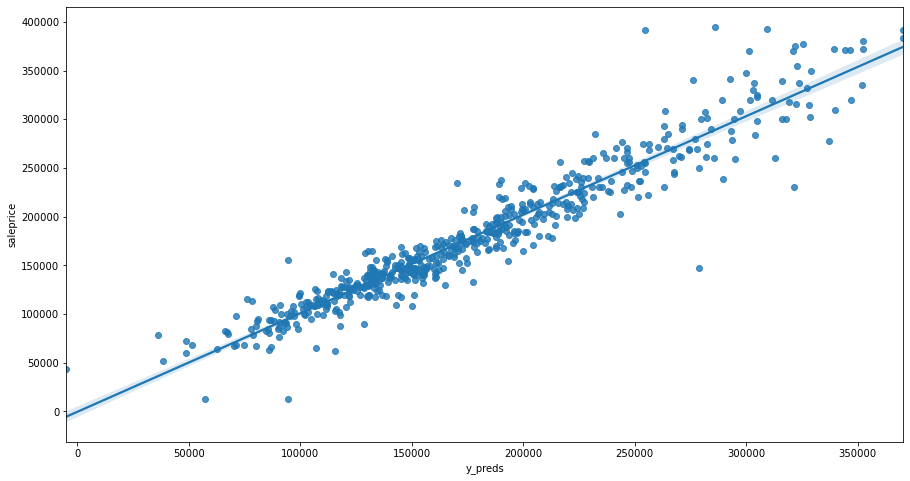

In [17]:
plt.figure(figsize=(15,8))
ax=sns.regplot(x=y1_pred, y=y_test)
ax.set(xlabel='y_preds',ylabel='saleprice')

#### Remarks: 

+ Lasso regression performs better than linear regression by eliminating the not useful variables and also take care of the multicollinearity. 
+ Lasso eliminates the not useful variable by making the coefficient to zero, those non-zero variables will then be identified as the new feature
+ To run ridge regression to compare the results to determine what the features need to be eliminated


## Ridge Regression
Attempt 1: Fit all the variable except saleprice as feature to find out the R2 , cross val score and rmse score

In [18]:
# Finding optimal alpha using RidgeCV
ridge_alphas=np.logspace(0,5,200)
optimal_ridge=RidgeCV(alphas=ridge_alphas,cv=5)
optimal_ridge.fit(Z_train,y_train)

# Ridge regression
ridge=Ridge(alpha=optimal_ridge.alpha_)
ridge.fit(Z_train,y_train)

# Cross validation
cross_train_r=cross_val_score(ridge,Z_train,y_train,cv=5)
cross_test_r=cross_val_score(ridge,Z_test,y_test,cv=5)

# Make predictions
y2_pred = ridge.predict(Z_test)

# Score
print("Linear regression:")
print("The R2 score for train linear regression is:",lr.score(Z_train, y_train))
print("The R2 score for test linear regression is:",lr.score(Z_test,y_test))
print("The cross val score for train is:",cross_train.mean())
print("The cross val score for test is:",cross_test.mean())
print("The rmse for linear regression is:",mean_squared_error(y_test, y_pred,squared=False))
print() 
print("Lasso regression:")
print("The R2 score for train lasso regression is:",lasso.score(Z_train, y_train))
print("The R2 score for test lasso regression is:",lasso.score(Z_test, y_test))
print("The cross val score for train is:",cross_train_l.mean())
print("The cross val score for test is:",cross_test_l.mean())
print("The rmse for lasso regression is:",mean_squared_error(y_test, y1_pred,squared=False))
print()
print('Results for Ridge Regression:')
print("The R2 score for train ridge regression is:",ridge.score(Z_train,y_train))
print("The R2 score for test ridge regression is:",ridge.score(Z_test,y_test))
print("The cross val score for train is:",cross_train_r.mean())
print("The cross val score for test is:",cross_test_r.mean())
print("The rmse for ridge regression is:",mean_squared_error(y_test, y2_pred,squared=False))

Linear regression:
The R2 score for train linear regression is: 0.9483346337644637
The R2 score for test linear regression is: -1.6357198499908025e+24
The cross val score for train is: -6.118093048162444e+25
The cross val score for test is: -3.6506124103886093e+22
The rmse for linear regression is: 8.962732595971803e+16

Lasso regression:
The R2 score for train lasso regression is: 0.9442304533130575
The R2 score for test lasso regression is: 0.9144417621279513
The cross val score for train is: 0.9129365967627964
The cross val score for test is: 0.878078813812245
The rmse for lasso regression is: 20498.255075805766

Results for Ridge Regression:
The R2 score for train ridge regression is: 0.9442935337556186
The R2 score for test ridge regression is: 0.9131597530403721
The cross val score for train is: 0.9098925113757765
The cross val score for test is: 0.8815270648563253
The rmse for ridge regression is: 20651.257518010087


#### Remarks: 

+ Ridge regression performs better than linear regression by shrinking  our regression coefficients closer to zero to make our model simpler and also take care of the multicollinearity. 
+ Comparing rmse between lasso and ridge, lasso seems to perform slightly better with their R2 values are quite comparable. 
+ New features will be lasso non-zero coeff variable.

In [19]:
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':np.round_(lasso.coef_,0),
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head()

,variable,coef,abs_coef
308,2nd_flr_sf,10493.0,10492.637103
269,overall_qual_8,9070.0,9069.806378
310,gr_liv_area,8860.0,8859.944166
306,total_bsmt_sf,8227.0,8227.141720
270,overall_qual_9,7307.0,7307.429542


In [20]:
l_feature=lasso_coefs[lasso_coefs['coef']!=0]['variable'].tolist()
len(l_feature)

180

In [21]:
lasso_coefs.sort_values('abs_coef', inplace=True, ascending=True)
lasso_coefs[lasso_coefs['coef']!=0]

,variable,coef,abs_coef
152,bsmt_qual_Po,1.0,0.848413
83,house_style_2.5Fin,1.0,1.007863
293,ms_subclass_80,-8.0,7.870745
32,neighborhood_Blueste,12.0,12.282446
231,garage_cond_Ex,15.0,14.682054
...,...,...,...
270,overall_qual_9,7307.0,7307.429542
306,total_bsmt_sf,8227.0,8227.141720
310,gr_liv_area,8860.0,8859.944166
269,overall_qual_8,9070.0,9069.806378


#### Remarks: 

+ The new features will have 179 variables

## Linear Regression
Attempt 2: Fit lasso non-zero variable as feature to find out the R2,cross val score and rmse score

In [22]:
# Define variables
X1=df_X[l_feature]
y1=df_X['saleprice']

# Perform train test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3,
                                                    random_state=42)

# Scaling of data
ss=StandardScaler()
Z1_train=ss.fit_transform(X1_train)
Z1_test=ss.transform(X1_test)

In [23]:
# Linear Regression
lr=LinearRegression()
lr.fit(Z1_train,y1_train)

# Cross validation
cross_train=cross_val_score(lr,Z1_train,y1_train,cv=5)
cross_test=cross_val_score(lr,Z1_test,y1_test,cv=5)

# Make predictions
y_pred=(lr.predict(Z1_test))

print("Linear regression:")
print("The R2 score for train linear regression is:",lr.score(Z1_train, y1_train))
print("The R2 score for test linear regression is:",lr.score(Z1_test,y1_test))
print("The cross val score for train is:",cross_train.mean())
print("The cross val score for test is:",cross_test.mean())
print("The rmse for linear regression is:",mean_squared_error(y1_test, y_pred,squared=False))


Linear regression:
The R2 score for train linear regression is: 0.9475622711076993
The R2 score for test linear regression is: -7.537499627314977e+20
The cross val score for train is: -3.0166241642444455e+23
The cross val score for test is: -1.367426729736788e+24
The rmse for linear regression is: 1923975906758191.0


Remarks:
- Linear regression without regularization is not the best model. 

## Lasso Regression
Attempt 2: Fit lasso non-zero variable as feature to find out the R2,cross val score and rmse score

In [24]:
# Finding optimal alpha using LassoCV
optimal_lasso = LassoCV(n_alphas=20, cv=5, verbose=1,max_iter=50000)
optimal_lasso.fit(Z1_train, y1_train)

# Lasso Regression 
lasso=Lasso(alpha=optimal_lasso.alpha_,max_iter=100000)
lasso.fit(Z1_train, y1_train)

# Cross validation
cross_train_l=cross_val_score(lasso,Z1_train,y1_train,cv=5)
cross_test_l=cross_val_score(lasso,Z1_test,y1_test,cv=5)

# Make predictions
y1_pred = lasso.predict(Z1_test)

# Score
print("Linear regression:")
print("The R2 score for train linear regression is:",lr.score(Z1_train, y1_train))
print("The R2 score for test linear regression is:",lr.score(Z1_test,y1_test))
print("The cross val score for train is:",cross_train.mean())
print("The cross val score for test is:",cross_test.mean())
print("The rmse for linear regression is:",mean_squared_error(y1_test, y_pred,squared=False))
print() 
print("Lasso regression:")
print("The R2 score for train lasso regression is:",lasso.score(Z1_train, y1_train))
print("The R2 score for test lasso regression is:",lasso.score(Z1_test, y1_test))
print("The cross val score for train is:",cross_train_l.mean())
print("The cross val score for test is:",cross_test_l.mean())
print("The rmse for lasso regression is:",mean_squared_error(y1_test, y1_pred,squared=False))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
....................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


Linear regression:
The R2 score for train linear regression is: 0.9475622711076993
The R2 score for test linear regression is: -7.537499627314977e+20
The cross val score for train is: -3.0166241642444455e+23
The cross val score for test is: -1.367426729736788e+24
The rmse for linear regression is: 1923975906758191.0

Lasso regression:
The R2 score for train lasso regression is: 0.9467740590925668
The R2 score for test lasso regression is: 0.9144503720992125
The cross val score for train is: 0.9161603358453474
The cross val score for test is: 0.8864200967266612
The rmse for lasso regression is: 20497.22365070936


Text(0.5, 1.0, 'Lasso regression plot of Predicted Sale Price verus Test Sale Price')

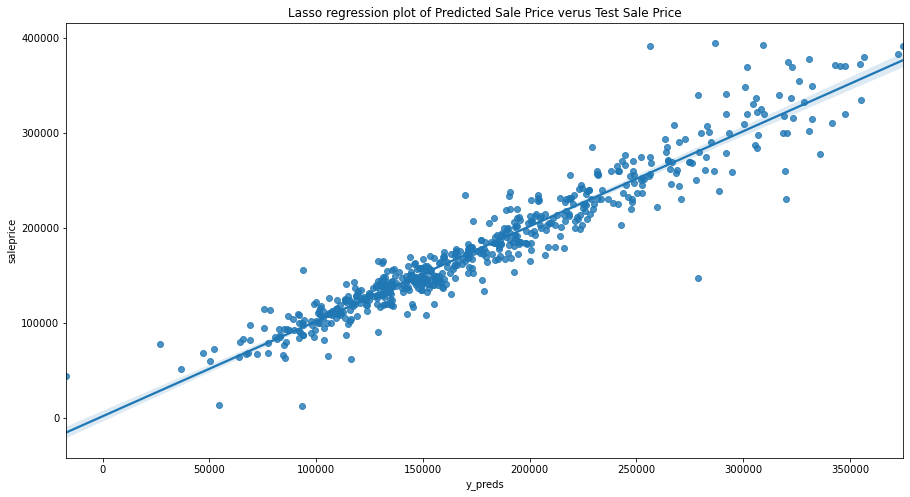

In [25]:
# Plotting the best fit line for predicted y and y
plt.figure(figsize=(15,8))
ax=sns.regplot(x=y1_pred, y=y1_test)
ax.set(xlabel='y_preds',ylabel='saleprice')
ax.set_title('Lasso regression plot of Predicted Sale Price verus Test Sale Price')

Text(0.5, 1.0, 'Plot of Predicted Sale Price verus Residues')

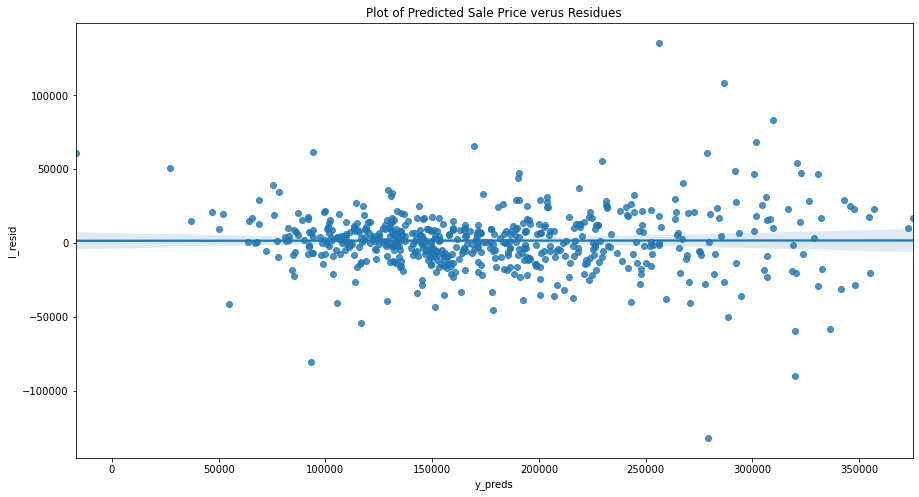

In [26]:
# Plot residues
l_resid = y1_test-lasso.predict(Z1_test)

plt.figure(figsize=(15,8))
ax=sns.regplot(x=y1_pred, y=l_resid)
ax.set(xlabel='y_preds',ylabel='l_resid')
ax.set_title('Plot of Predicted Sale Price verus Residues')

## Ridge Regression
Attempt 2: Fit lasso non-zero variable as feature to find out the R2,cross val score and rmse score

In [27]:
# Finding optimal alpha using RidgeCV
ridge_alphas=np.logspace(0,5,200)
optimal_ridge=RidgeCV(alphas=ridge_alphas,cv=5)
optimal_ridge.fit(Z1_train,y1_train)

# Ridge regression
ridge=Ridge(alpha=optimal_ridge.alpha_)
ridge.fit(Z1_train,y1_train)

# Cross validation
cross_train_r=cross_val_score(ridge,Z1_train,y1_train,cv=5)
cross_test_r=cross_val_score(ridge,Z1_test,y1_test,cv=5)

# Make predictions
y2_pred = ridge.predict(Z1_test)

# Score
print("Linear regression:")
print("The R2 score for train linear regression is:",lr.score(Z1_train, y1_train))
print("The R2 score for test linear regression is:",lr.score(Z1_test,y1_test))
print("The cross val score for train is:",cross_train.mean())
print("The cross val score for test is:",cross_test.mean())
print("The rmse for linear regression is:",mean_squared_error(y1_test, y_pred,squared=False))
print() 
print("Lasso regression:")
print("The R2 score for train lasso regression is:",lasso.score(Z1_train, y1_train))
print("The R2 score for test lasso regression is:",lasso.score(Z1_test, y1_test))
print("The cross val score for train is:",cross_train_l.mean())
print("The cross val score for test is:",cross_test_l.mean())
print("The rmse for lasso regression is:",mean_squared_error(y1_test, y1_pred,squared=False))
print()
print('Results for Ridge Regression:')
print("The R2 score for train ridge regression is:",ridge.score(Z1_train,y1_train))
print("The R2 score for test ridge regression is:",ridge.score(Z1_test,y1_test))
print("The cross val score for train is:",cross_train_l.mean())
print("The cross val score for test is:",cross_test_l.mean())
print("The rmse for ridge regression is:",mean_squared_error(y1_test, y2_pred,squared=False))

Linear regression:
The R2 score for train linear regression is: 0.9475622711076993
The R2 score for test linear regression is: -7.537499627314977e+20
The cross val score for train is: -3.0166241642444455e+23
The cross val score for test is: -1.367426729736788e+24
The rmse for linear regression is: 1923975906758191.0

Lasso regression:
The R2 score for train lasso regression is: 0.9467740590925668
The R2 score for test lasso regression is: 0.9144503720992125
The cross val score for train is: 0.9161603358453474
The cross val score for test is: 0.8864200967266612
The rmse for lasso regression is: 20497.22365070936

Results for Ridge Regression:
The R2 score for train ridge regression is: 0.9453831229988505
The R2 score for test ridge regression is: 0.913727859081414
The cross val score for train is: 0.9161603358453474
The cross val score for test is: 0.8864200967266612
The rmse for ridge regression is: 20583.59675388807


Text(0.5, 1.0, 'Regression plot of Predicted Sale Price verus Test Sale Price')

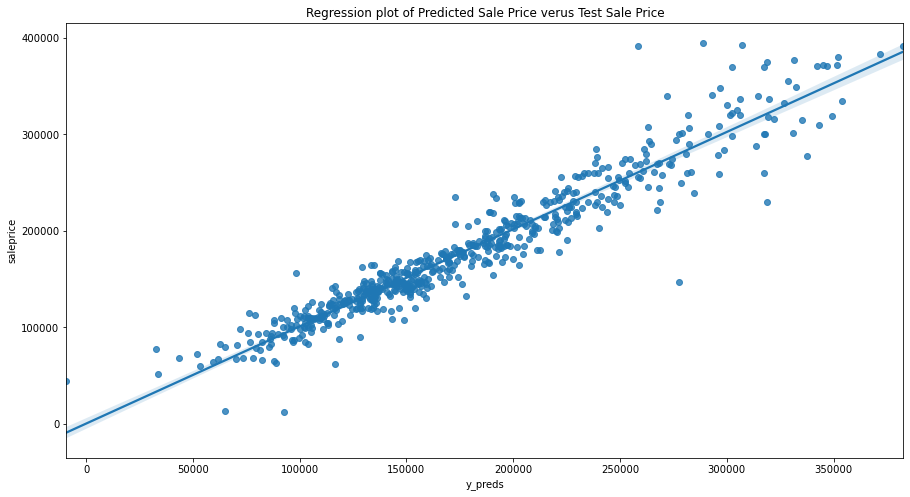

In [28]:
plt.figure(figsize=(15,8))
ax=sns.regplot(x=y2_pred, y=y1_test)
ax.set(xlabel='y_preds',ylabel='saleprice')
ax.set_title('Regression plot of Predicted Sale Price verus Test Sale Price')

# Evaluation of the selected model

In [29]:
# Best Model for the dataset
print("Lasso regression:")
print("The R2 score for train lasso regression is:",lasso.score(Z1_train, y1_train))
print("The R2 score for test lasso regression is:",lasso.score(Z1_test, y1_test))
print("The cross val score for train is:",cross_train_l.mean())
print("The cross val score for test is:",cross_test_l.mean())
print("The rmse for lasso regression is:",mean_squared_error(y1_test, y1_pred,squared=False))

Lasso regression:
The R2 score for train lasso regression is: 0.9467740590925668
The R2 score for test lasso regression is: 0.9144503720992125
The cross val score for train is: 0.9161603358453474
The cross val score for test is: 0.8864200967266612
The rmse for lasso regression is: 20497.22365070936


In [30]:
# Baseline RMSE
(np.mean(np.square(df['Y'] - df['Mean_Yhat']))) ** 0.5

66481.33069311839

#### Remarks: 

- Lasso regression perform the best which accounts for 88% of the variance and the best RMSE score is USD 20,508 as compared to the baseline of USD 66,481.33.

- The regression plot shows that the model is unable to predict well for house above USD300,000. This may be due to removal of houses above USD 400,000 as outliers.


Text(0.5, 1.0, 'Plot of Predicted Sale Price verus Residues')

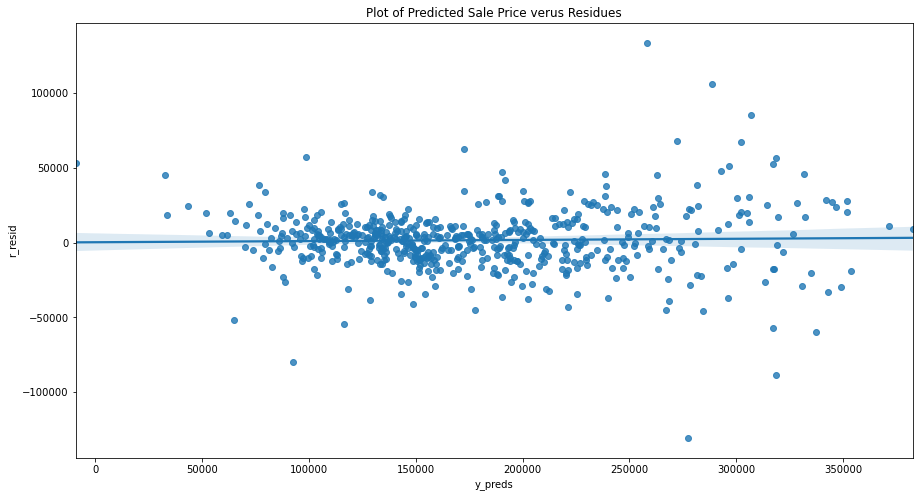

In [31]:
# Plot residues
r_resid = y1_test-ridge.predict(Z1_test)

plt.figure(figsize=(15,8))
ax=sns.regplot(x=y2_pred, y=r_resid)
ax.set(xlabel='y_preds',ylabel='r_resid')
ax.set_title('Plot of Predicted Sale Price verus Residues')

In [32]:
# Put lasso coeff into dataframe
lasso_coefs1 = pd.DataFrame({'variable':X1.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs1.sort_values('coef', inplace=True, ascending=False)

lasso_coefs1[:20]

,variable,coef,abs_coef
0,2nd_flr_sf,12631.385400,12631.385400
1,overall_qual_8,8766.717667,8766.717667
3,total_bsmt_sf,8550.080097,8550.080097
6,1st_flr_sf,8134.383592,8134.383592
4,overall_qual_9,7353.796894,7353.796894
2,gr_liv_area,6766.469131,6766.469131
7,bsmtfin_sf_1,6062.554979,6062.554979
8,lot_area,5772.933204,5772.933204
10,overall_qual_7,3800.430205,3800.430205
9,kitchen_qual_Ex,3687.087987,3687.087987


[Text(0, 0, '2nd_flr_sf'),
 Text(1, 0, 'overall_qual_8'),
 Text(2, 0, 'total_bsmt_sf'),
 Text(3, 0, '1st_flr_sf'),
 Text(4, 0, 'overall_qual_9'),
 Text(5, 0, 'gr_liv_area'),
 Text(6, 0, 'bsmtfin_sf_1'),
 Text(7, 0, 'lot_area'),
 Text(8, 0, 'overall_qual_7'),
 Text(9, 0, 'kitchen_qual_Ex'),
 Text(10, 0, 'neighborhood_GrnHill'),
 Text(11, 0, 'neighborhood_NridgHt'),
 Text(12, 0, 'bsmt_qual_Ex'),
 Text(13, 0, 'bldg_type_1Fam'),
 Text(14, 0, 'neighborhood_Crawfor'),
 Text(15, 0, 'bsmt_exposure_Gd'),
 Text(16, 0, 'exterior_1st_BrkFace'),
 Text(17, 0, 'overall_qual_10'),
 Text(18, 0, 'neighborhood_NoRidge'),
 Text(19, 0, 'neighborhood_Somerst')]

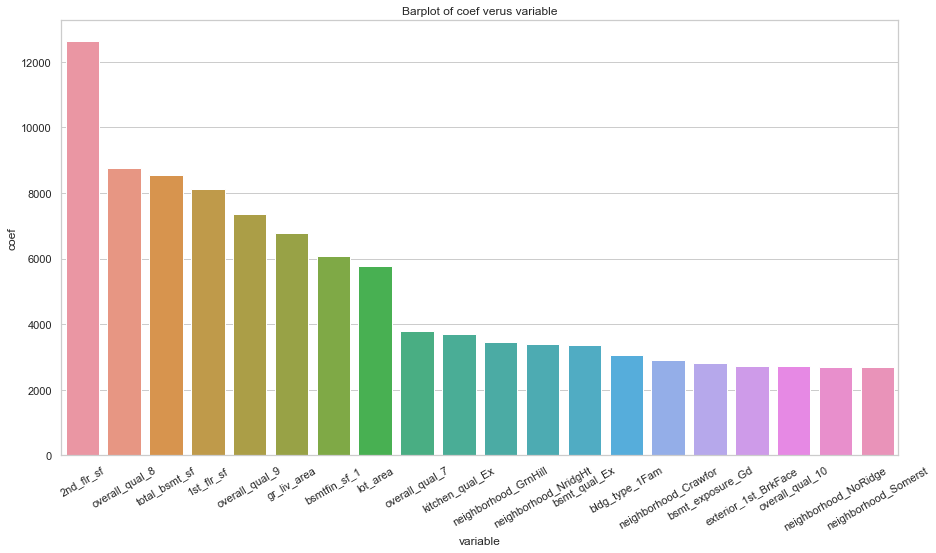

In [33]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,8))
ax = sns.barplot(x="variable", y="coef", data=lasso_coefs1[:20])
ax.set_title('Barplot of coef verus variable')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

## Conclusion and Recommendation

The sale price of the house can be modelled with much greater accuracy by using the feature identified by lasso regression. 
<br>The following are the summary of steps that was taken to derive at the final model:
+ Exploratory data analysis (EDA)
+ Data Cleaning 
    - Imputing missing data
    - Outlier removal
    - One hot encoded variables (get_dummies)
+ Pre-processing and Feature Engineering
    - Create new column (house_age)
    - using lasso coefficient for feature selection
+ Modelling and evaluation 
    - Hyperparameter tuning
    
<br>In conclusion, by applying regularization, there is a great improvement in the performance of the model. The best regression model has a R2 score of 0.88 which accounts for 88% of the variance and a RMSE score of $20,497. 
<br>
<br>The following are the top 20 important features of the residential housing that can potentially help to increase its value, not in ranking order: 
+ Size of the house (area of 1st floor, 2nd floor, basement, ground living, lot, basement type 1 finished) 
+ Having an overall house quality of 7,8,9,10
+ Excellent Kitchen quality 
+ Residential houses in the neighbourhood of Greenhill, Northridge Heights,Crawford, Northridge and Somerset
+ Excellent basement Quality which evaluates the height of the basement
+ Building type - single-family detached
+ Good exposure to walkout or garden level basement walls
+ 1st exterior covering on house - brick face

With that, the recommended locations that client will be interested to explore are :
- Greenhill
- Northridge Heights
- Crawford
- Northridge
- Somerset

The features that client can consider renovating to increase value are: 
- Increase the overall house material and finish quality
- Kitchen quality 
- Brick face house exterior 

The model limits to Ames residential housing and the housing value is not up to date as the database was taken from 2006 to 2010. 

## Kaggle challenge Submission

#### Lasso Model with l_features

In [34]:
df_X_test = pd.read_csv('../data/df_X_test.csv')

In [35]:
df_X_test.shape

(878, 332)

The selected model used for prediction will be lasso regression model using [l_feature]. These features are having coefficient more than 0 after running through the lasso regularization. 

In [36]:
# Define variable for Test dataset
X_test=df_X_test[l_feature]

In [37]:
#scaling of data
ss=StandardScaler()
Z1_train=ss.fit_transform(X1_train)
X_scaled=ss.transform(X_test)

In [38]:
# Finding optimal alpha using LassoCV
optimal_lasso = LassoCV(n_alphas=20, cv=5, verbose=1,max_iter=50000)
optimal_lasso.fit(Z1_train, y1_train)
print(optimal_lasso.alpha_)

# Lasso Regression 
lasso=Lasso(alpha=optimal_lasso.alpha_,max_iter=100000)
lasso.fit(Z1_train, y1_train)

# Cross validation
cross_train_l=cross_val_score(lasso,Z1_train,y1_train,cv=5)

# Make predictions
test_pred = lasso.predict(X_scaled)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
....................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


131.58253847276657


In [39]:
submit_df = pd.DataFrame(df_X_test['id'])
submit_df['SalePrice'] = test_pred

In [40]:
submit_df.to_csv('../data/kaggle_sub.csv', index=False)

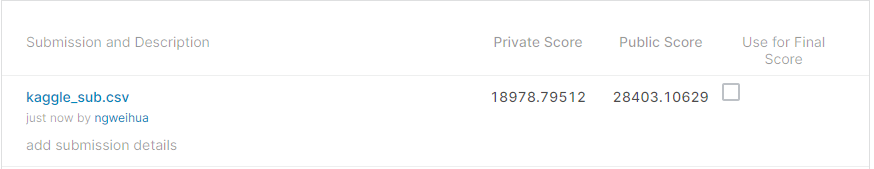

## Future steps

Here are some of the steps to improve the model: 
- Log transformation of the house saleprice instead of dropping them as outlier as the graph shows that the model cannot predict well after house sale price of $300,000 
- Grouping the features such as area to create one feature to reduce noise and multicollinearity
- Try different models to predict the saleprice such as elastic net